In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)


Found 2626 images belonging to 5 classes.
Found 2626 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [ ]:
import numpy as np

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5468 - accuracy: 0.4332 - val_loss: 1.2596 - val_accuracy: 0.5471
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1807 - accuracy: 0.5814 - val_loss: 1.1173 - val_accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0334 - accuracy: 0.6354 - val_loss: 1.0996 - val_accuracy: 0.6111
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9390 - accuracy: 0.6717 - val_loss: 0.9507 - val_accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8607 - accuracy: 0.6956 - val_loss: 0.9094 - val_accuracy: 0.6820
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8049 - accuracy: 0.7175 - val_loss: 0.9079 - val_accuracy: 0.6786
Epoch 7/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.7576 - accuracy: 0.7353 - val_loss: 0.8498 -

In [ ]:
#Saving our model
model.save('fruit.h5')

In [ ]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruit.h5')

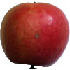

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/TEST_SET/APPLES/151_100.jpg',target_size=(70,70))
img

In [ ]:
x= image.img_to_array(img)

In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'